# 삼성카드 공모전 / SCDC

### 데이터 명명 규칙

- df
        모든 독립변수 + 온라인가맹점번호(target)+ 고객관리번호 + 업종
- df_e
        모든 독립변수 + 온라인가맹점번호(target)
- df_x
        모든 독립변수
- df_y
        온라인가맹점번호(target)
- df_x_n
        df_x 데이터를 0~1 사이로 정규화
- x_train, x_test, y_train, y_test
        df_x, df_y 로 split
- x_train_n, x_test_n, y_train, y_test
        df_x_n, df_y 로 split

### 환경설정

In [79]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 인덱스 뷰 키우기
pd.set_option('display.max_row', 600)
pd.set_option('display.max_columns', 300)

# 모든 데이터 내용 다 보이게하기
pd.set_option('display.max_colwidth', 50)
#pd.set_option('display.max_colwidth', None)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '20200904.ipynb',
 'SCDC 과제 계획서.pptx',
 'SCDC+INFORMATION (1).pdf',
 '[Track1_데이터1] mrc_info.csv',
 '[Track1_데이터2] samp_train.csv',
 '[Track1_데이터3] samp_cst_feat.csv',
 '[Track1_데이터4] variable_dtype.xlsx',
 '[기타] SCDC_공모전 테이블 설명.xlsx',
 '최종실행코드.ipynb']

In [3]:
df1 = pd.read_csv("./data/[Track1_데이터1] mrc_info.csv", encoding='cp949')
df2 = pd.read_csv("./data/[Track1_데이터2] samp_train.csv")
df3 = pd.read_csv("./data/[Track1_데이터3] samp_cst_feat.csv")

### 데이터 파악

In [4]:
df3.describe()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
count,1.012400e+04,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,...,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000
mean,9.000023e+10,-0.003885,0.484221,0.031501,-0.024218,0.174790,0.147274,0.499152,0.040759,0.519672,...,0.040473,-0.029356,-0.020689,-0.021676,-0.043900,-0.022023,-0.012452,-0.013461,-0.012979,0.108977
std,1.328699e+05,0.078605,0.289560,0.191960,0.152056,0.255651,0.354396,0.291301,0.238548,0.288771,...,0.332091,0.298928,0.131485,0.136662,0.356804,0.144375,0.095042,0.119907,0.222926,0.218093
min,9.000000e+10,-0.149210,0.000000,-0.372920,-0.401530,-0.548990,0.000000,0.000300,-0.397870,0.000200,...,-0.563020,-0.626250,-0.363750,-0.353290,-0.741050,-0.398630,-0.220150,-0.303640,-0.467600,-0.605860
25%,9.000011e+10,-0.045090,0.232800,-0.103395,-0.101340,-0.001733,0.000000,0.240575,-0.133587,0.270150,...,-0.245655,-0.293895,-0.081338,-0.090155,-0.360805,-0.085207,-0.059973,-0.062948,-0.198983,-0.052858
50%,9.000023e+10,-0.018645,0.476750,-0.027615,-0.002925,0.199040,0.000000,0.501350,-0.038720,0.529700,...,-0.017425,0.022250,0.002720,-0.003550,0.007460,-0.004605,-0.024280,0.000355,-0.015095,0.130155
75%,9.000034e+10,0.011810,0.733425,0.126370,0.065545,0.376333,0.000000,0.759175,0.169905,0.773300,...,0.337570,0.229442,0.051400,0.059203,0.257642,0.055200,0.014600,0.034780,0.163442,0.284427
max,9.000046e+10,0.806840,1.000000,0.816550,0.693810,0.768420,1.000000,0.999000,0.765570,1.000000,...,0.717310,0.539590,0.748260,0.846510,0.668910,0.642780,0.679440,0.690920,0.655520,0.701840


In [5]:
df3.columns

Index(['cst_id_di', 'VAR002', 'VAR003', 'VAR004', 'VAR005', 'VAR006', 'VAR007',
       'VAR008', 'VAR009', 'VAR010',
       ...
       'VAR218', 'VAR219', 'VAR220', 'VAR221', 'VAR222', 'VAR223', 'VAR224',
       'VAR225', 'VAR226', 'VAR227'],
      dtype='object', length=227)

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10124 entries, 0 to 10123
Columns: 227 entries, cst_id_di to VAR227
dtypes: float64(198), int64(29)
memory usage: 17.5 MB


In [4]:
df3

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,...,-0.19780,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995
10120,90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,...,0.09259,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301
10121,90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,...,0.46478,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357
10122,90000460310,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,...,0.10340,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931


In [5]:
df2

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6
...,...,...
10119,90000460112,7
10120,90000460117,0
10121,90000460233,0
10122,90000460310,0


In [6]:
df3['cst_id_di']

0        90000000089
1        90000000176
2        90000000210
3        90000000212
4        90000000213
            ...     
10119    90000460112
10120    90000460117
10121    90000460233
10122    90000460310
10123    90000460313
Name: cst_id_di, Length: 10124, dtype: int64

In [7]:
key = pd.merge(df2, df1, on = "MRC_ID_DI")

In [11]:
key

,cst_id_di,MRC_ID_DI,Category
0,90000000089,0,미이용
1,90000000210,0,미이용
2,90000000263,0,미이용
3,90000000322,0,미이용
4,90000000354,0,미이용
...,...,...,...
10119,90000348711,4,전문몰
10120,90000370385,4,전문몰
10121,90000413012,4,전문몰
10122,90000422706,4,전문몰


In [8]:
df = pd.merge(key, df3, on = "cst_id_di")

In [13]:
df

,cst_id_di,MRC_ID_DI,Category,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,0,미이용,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000210,0,미이용,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
2,90000000263,0,미이용,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
3,90000000322,0,미이용,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
4,90000000354,0,미이용,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000348711,4,전문몰,-0.06102,0.4577,-0.00078,0.03643,-0.08422,0,0.2038,...,-0.06718,0.20808,-0.00682,0.03806,0.05194,-0.02781,-0.06693,0.01964,0.24685,-0.12737
10120,90000370385,4,전문몰,0.08022,0.1456,-0.09000,0.08134,0.18006,0,0.2014,...,-0.21824,0.06535,0.05611,0.06947,0.22530,0.01971,0.03257,0.01651,0.12013,0.12348
10121,90000413012,4,전문몰,0.00704,0.7367,0.14569,-0.01965,0.10966,0,0.7391,...,0.10275,-0.02049,-0.05586,-0.01862,0.00152,-0.06403,-0.00941,-0.05569,0.18450,-0.05793
10122,90000422706,4,전문몰,-0.02005,0.3760,-0.21565,-0.02333,-0.22389,0,0.9906,...,-0.32357,0.35647,0.05146,0.01153,0.31488,-0.01150,0.00885,0.07040,0.45774,-0.29717


In [14]:
df.isnull().sum()
## null 데이터 없음

cst_id_di    0
MRC_ID_DI    0
Category     0
VAR002       0
VAR003       0
VAR004       0
VAR005       0
VAR006       0
VAR007       0
VAR008       0
VAR009       0
VAR010       0
VAR011       0
VAR012       0
VAR013       0
VAR014       0
VAR015       0
VAR016       0
VAR017       0
VAR018       0
VAR019       0
VAR020       0
VAR021       0
VAR022       0
VAR023       0
VAR024       0
VAR025       0
VAR026       0
VAR027       0
VAR028       0
VAR029       0
VAR030       0
VAR031       0
VAR032       0
VAR033       0
VAR034       0
VAR035       0
VAR036       0
VAR037       0
VAR038       0
VAR039       0
VAR040       0
VAR041       0
VAR042       0
VAR043       0
VAR044       0
VAR045       0
VAR046       0
VAR047       0
VAR048       0
VAR049       0
VAR050       0
VAR051       0
VAR052       0
VAR053       0
VAR054       0
VAR055       0
VAR056       0
VAR057       0
VAR058       0
VAR059       0
VAR060       0
VAR061       0
VAR062       0
VAR063       0
VAR064       0
VAR065    

In [15]:
df

,cst_id_di,MRC_ID_DI,Category,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,0,미이용,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000210,0,미이용,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
2,90000000263,0,미이용,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
3,90000000322,0,미이용,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
4,90000000354,0,미이용,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000348711,4,전문몰,-0.06102,0.4577,-0.00078,0.03643,-0.08422,0,0.2038,...,-0.06718,0.20808,-0.00682,0.03806,0.05194,-0.02781,-0.06693,0.01964,0.24685,-0.12737
10120,90000370385,4,전문몰,0.08022,0.1456,-0.09000,0.08134,0.18006,0,0.2014,...,-0.21824,0.06535,0.05611,0.06947,0.22530,0.01971,0.03257,0.01651,0.12013,0.12348
10121,90000413012,4,전문몰,0.00704,0.7367,0.14569,-0.01965,0.10966,0,0.7391,...,0.10275,-0.02049,-0.05586,-0.01862,0.00152,-0.06403,-0.00941,-0.05569,0.18450,-0.05793
10122,90000422706,4,전문몰,-0.02005,0.3760,-0.21565,-0.02333,-0.22389,0,0.9906,...,-0.32357,0.35647,0.05146,0.01153,0.31488,-0.01150,0.00885,0.07040,0.45774,-0.29717


In [16]:
df['Category'].value_counts()

미이용        8200
홈쇼핑         976
오픈마켓_소셜     661
종합몰         175
전문몰          70
종합물          42
Name: Category, dtype: int64

In [17]:
df['MRC_ID_DI'].value_counts()

0     8200
7      661
6      554
8      337
5      143
1       85
9       59
3       32
10      28
2       14
4       11
Name: MRC_ID_DI, dtype: int64

In [9]:
df = df.rename({"cst_id_di":"고객관리번호", 'MRC_ID_DI':"label", 'Category':"업종"}, axis=1)

In [11]:
df.head(100)

,고객관리번호,label,업종,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,0,미이용,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000210,0,미이용,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
2,90000000263,0,미이용,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
3,90000000322,0,미이용,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
4,90000000354,0,미이용,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
5,90000000407,0,미이용,-0.05230,0.8113,0.15073,-0.13863,0.29000,0,0.7609,...,0.34169,-0.31556,-0.05619,-0.12529,-0.33037,-0.14996,-0.11212,-0.06738,-0.13817,0.23949
6,90000000408,0,미이용,0.01857,0.4810,0.23696,-0.10609,0.35089,1,0.4149,...,0.40550,-0.38249,-0.03346,-0.09783,-0.36728,-0.02534,-0.03302,-0.01098,-0.09301,0.29357
7,90000000529,0,미이용,-0.03524,0.4005,-0.13904,0.14661,-0.10339,0,0.9348,...,-0.22203,0.33349,0.14327,0.15414,0.16596,0.16593,0.02951,0.03292,0.28011,-0.29552
8,90000000604,0,미이용,-0.01500,0.9910,0.55990,-0.30425,0.08286,0,0.3818,...,0.60862,-0.54149,-0.29730,-0.27381,-0.64158,-0.29302,-0.14089,-0.26949,-0.39133,0.30117
9,90000000606,0,미이용,0.07724,0.6547,0.70407,-0.16283,0.22325,0,0.5823,...,0.53548,-0.41174,-0.21514,-0.15185,-0.45631,-0.18653,-0.00930,-0.21110,-0.15886,0.09647


In [12]:
df_x = df.drop(["고객관리번호","업종","label"],axis = 1)

In [21]:
df_x

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
2,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,-0.13009,0.7291,-0.39929,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
3,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,0.39811,0.2458,0.45440,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
4,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,-0.11848,0.2781,0.20183,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,-0.06102,0.4577,-0.00078,0.03643,-0.08422,0,0.2038,-0.04045,0.8995,-0.03143,...,-0.06718,0.20808,-0.00682,0.03806,0.05194,-0.02781,-0.06693,0.01964,0.24685,-0.12737
10120,0.08022,0.1456,-0.09000,0.08134,0.18006,0,0.2014,-0.13644,0.9880,0.27385,...,-0.21824,0.06535,0.05611,0.06947,0.22530,0.01971,0.03257,0.01651,0.12013,0.12348
10121,0.00704,0.7367,0.14569,-0.01965,0.10966,0,0.7391,0.13386,0.9709,0.31793,...,0.10275,-0.02049,-0.05586,-0.01862,0.00152,-0.06403,-0.00941,-0.05569,0.18450,-0.05793
10122,-0.02005,0.3760,-0.21565,-0.02333,-0.22389,0,0.9906,-0.10244,0.8682,-0.31850,...,-0.32357,0.35647,0.05146,0.01153,0.31488,-0.01150,0.00885,0.07040,0.45774,-0.29717


In [13]:
df_y = df[['label']]

In [23]:
df_y

,label
0,0
1,0
2,0
3,0
4,0
...,...
10119,4
10120,4
10121,4
10122,4


In [14]:
df_x.iloc[:,0]

0       -0.06610
1       -0.01048
2       -0.10778
3        0.02596
4        0.03735
          ...   
10119   -0.06102
10120    0.08022
10121    0.00704
10122   -0.02005
10123   -0.01642
Name: VAR002, Length: 10124, dtype: float64

In [25]:
np.sort(df_x.iloc[:,0])

array([-0.14921, -0.14349, -0.13842, ...,  0.67422,  0.72609,  0.80684])

In [ ]:
df_x.iloc[:,0:100].boxplot(figsize=(150,10))

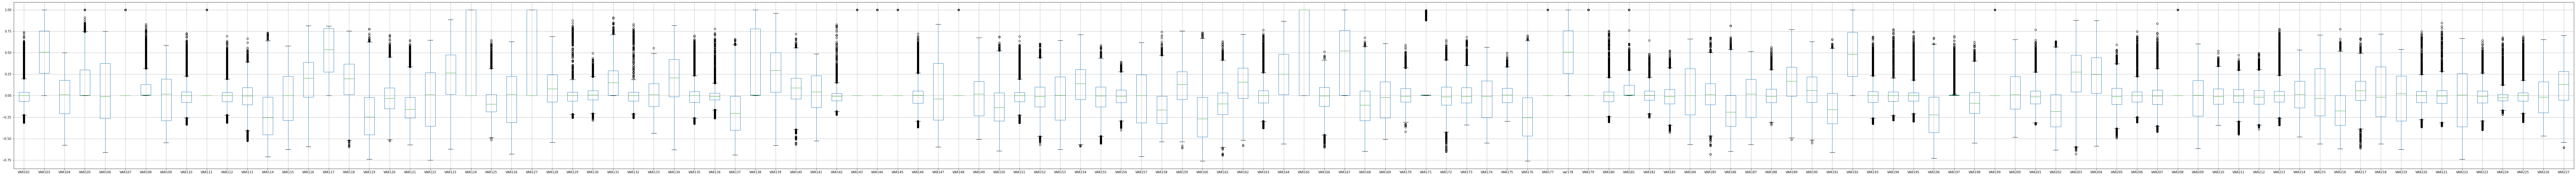

In [17]:
df_x.iloc[:,100:].boxplot(figsize=(150,10))

## 독립변수 특성 파악

### 0,1

1. 대부분 0이 많음

In [15]:
f_list = [7,15,18,26,59,66,67,70,71,77,78,94,96,97,98,107,111,124,127,143,144,145,148,177,179,199,208]
f1_list = [(i-2) for i in f_list]
df_x.iloc[:,f1_list]

## 결과 : f1_list 는 0,1 데이터만 존재

,VAR007,VAR015,VAR018,VAR026,VAR059,VAR066,VAR067,VAR070,VAR071,VAR077,...,VAR124,VAR127,VAR143,VAR144,VAR145,VAR148,VAR177,VAR179,VAR199,VAR208
0,0,1,0,0,1,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10120,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10121,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10122,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
df_x['VAR007'].value_counts()

0    8633
1    1491
Name: VAR007, dtype: int64

In [35]:
for i in range(len(f1_list)):
    print(df_x.iloc[:,f1_list].iloc[:,i].value_counts())

0    8633
1    1491
Name: VAR007, dtype: int64
0    5430
1    4694
Name: VAR015, dtype: int64
0    8009
1    2115
Name: VAR018, dtype: int64
0    9926
1     198
Name: VAR026, dtype: int64
0    7606
1    2518
Name: VAR059, dtype: int64
0    7324
1    2800
Name: VAR066, dtype: int64
1    8723
0    1401
Name: VAR067, dtype: int64
0    8166
1    1958
Name: VAR070, dtype: int64
0    9314
1     810
Name: VAR071, dtype: int64
0    8769
1    1355
Name: VAR077, dtype: int64
0    9738
1     386
Name: VAR078, dtype: int64
0    9515
1     609
Name: VAR094, dtype: int64
0    9158
1     966
Name: VAR096, dtype: int64
0    8956
1    1168
Name: VAR097, dtype: int64
0    9306
1     818
Name: VAR098, dtype: int64
0    8434
1    1690
Name: VAR107, dtype: int64
0    7949
1    2175
Name: VAR111, dtype: int64
0    7452
1    2672
Name: VAR124, dtype: int64
0    7249
1    2875
Name: VAR127, dtype: int64
0    9952
1     172
Name: VAR143, dtype: int64
0    9485
1     639
Name: VAR144, dtype: int64
0    8960
1  

### var171

1. 0.0000xxx
2. 0.8~0.99 

In [27]:
df_x[["VAR171"]].sort_values(by=["VAR171"])

,VAR171
5664,0.0000
5187,0.0000
2105,0.0000
614,0.0000
7549,0.0000
...,...
5235,0.9916
8694,0.9916
6838,0.9918
9407,0.9918


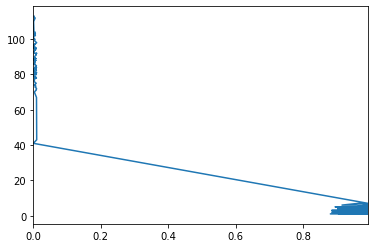

In [28]:
df_x['VAR171'].value_counts().plot()

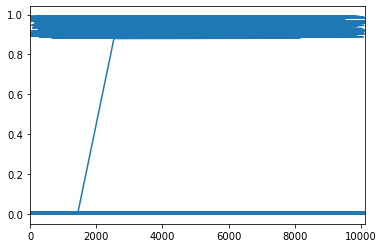

In [43]:
df_x['VAR171'].sort_values().plot()

### 상관관계

In [82]:
df.corr().loc['VAR122','VAR222']

0.9899081153199158

In [72]:
df.corr() >= 0.7

,고객관리번호,label,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
고객관리번호,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
label,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [73]:
df.corr()['VAR215']

고객관리번호    0.004891
label    -0.316493
VAR002    0.125026
VAR003    0.642283
VAR004    0.841529
VAR005   -0.761252
VAR006    0.488889
VAR007    0.199469
VAR008    0.155229
VAR009    0.868334
VAR010   -0.412775
VAR011    0.620516
VAR012    0.473973
VAR013   -0.588192
VAR014   -0.450958
VAR015   -0.000792
VAR016    0.231078
VAR017   -0.416027
VAR018    0.066035
VAR019   -0.608454
VAR020   -0.726082
VAR021    0.887180
VAR022    0.220521
VAR023   -0.569893
VAR024    0.062981
VAR025    0.934346
VAR026   -0.013817
VAR027    0.442880
VAR028    0.427421
VAR029   -0.792685
VAR030   -0.679102
VAR031   -0.191712
VAR032   -0.526495
VAR033   -0.441878
VAR034    0.832185
VAR035   -0.501046
VAR036    0.155179
VAR037   -0.762832
VAR038    0.382730
VAR039    0.613510
VAR040    0.087496
VAR041   -0.403670
VAR042   -0.386663
VAR043   -0.947138
VAR044   -0.766040
VAR045   -0.748809
VAR046    0.630350
VAR047    0.802434
VAR048   -0.159948
VAR049   -0.143398
VAR050   -0.080771
VAR051   -0.544855
VAR052   -0.

In [212]:
corr_set= df_x.corr().abs().unstack().sort_values(ascending=False)
corr_set_index = corr_set[(corr_set>0.9) & (corr_set!=1)].index

In [213]:
corr_set_index = corr_set_index[range(0,len(corr_set_index),2)]

In [214]:
remove_column = []
for all_index in corr_set_index:
    remove_column.append(all_index[0])
    print(all_index)

('VAR222', 'VAR122')
('VAR106', 'VAR147')
('VAR222', 'VAR147')
('VAR122', 'VAR218')
('VAR106', 'VAR222')
('VAR147', 'VAR122')
('VAR126', 'VAR147')
('VAR093', 'VAR106')
('VAR215', 'VAR093')
('VAR115', 'VAR153')
('VAR093', 'VAR184')
('VAR043', 'VAR222')
('VAR021', 'VAR115')
('VAR157', 'VAR222')
('VAR114', 'VAR160')
('VAR147', 'VAR093')
('VAR147', 'VAR218')
('VAR157', 'VAR115')
('VAR215', 'VAR184')
('VAR106', 'VAR122')
('VAR060', 'VAR076')
('VAR122', 'VAR157')
('VAR153', 'VAR021')
('VAR222', 'VAR218')
('VAR203', 'VAR139')
('VAR147', 'VAR043')
('VAR106', 'VAR126')
('VAR106', 'VAR043')
('VAR043', 'VAR093')
('VAR058', 'VAR014')
('VAR153', 'VAR219')
('VAR012', 'VAR134')
('VAR216', 'VAR091')
('VAR126', 'VAR222')
('VAR176', 'VAR114')
('VAR106', 'VAR157')
('VAR106', 'VAR218')
('VAR157', 'VAR147')
('VAR222', 'VAR093')
('VAR106', 'VAR219')
('VAR116', 'VAR123')
('VAR056', 'VAR047')
('VAR219', 'VAR147')
('VAR043', 'VAR122')
('VAR056', 'VAR115')
('VAR126', 'VAR093')
('VAR126', 'VAR122')
('VAR122', 'V

In [175]:
list(set(remove_column))

['VAR014',
 'VAR150',
 'VAR174',
 'VAR043',
 'VAR021',
 'VAR013',
 'VAR051',
 'VAR012',
 'VAR184',
 'VAR116',
 'VAR153',
 'VAR222',
 'VAR191',
 'VAR216',
 'VAR019',
 'VAR011',
 'VAR095',
 'VAR123',
 'VAR139',
 'VAR176',
 'VAR089',
 'VAR039',
 'VAR058',
 'VAR056',
 'VAR114',
 'VAR134',
 'VAR037',
 'VAR068',
 'VAR119',
 'VAR069',
 'VAR149',
 'VAR162',
 'VAR223',
 'VAR155',
 'VAR106',
 'VAR109',
 'VAR082',
 'VAR006',
 'VAR034',
 'VAR038',
 'VAR207',
 'VAR215',
 'VAR214',
 'VAR104',
 'VAR122',
 'VAR027',
 'VAR160',
 'VAR009',
 'VAR005',
 'VAR158',
 'VAR157',
 'VAR203',
 'VAR218',
 'VAR187',
 'VAR202',
 'VAR115',
 'VAR154',
 'VAR076',
 'VAR226',
 'VAR052',
 'VAR032',
 'VAR060',
 'VAR196',
 'VAR029',
 'VAR147',
 'VAR168',
 'VAR080',
 'VAR028',
 'VAR063',
 'VAR159',
 'VAR061',
 'VAR047',
 'VAR186',
 'VAR025',
 'VAR204',
 'VAR164',
 'VAR093',
 'VAR126',
 'VAR137',
 'VAR091',
 'VAR141',
 'VAR169',
 'VAR209',
 'VAR165',
 'VAR166',
 'VAR227',
 'VAR219']

In [215]:
df_remove_corr  = df_x.drop(list(set(remove_column)),axis=1)

In [216]:
df_remove_corr

,VAR002,VAR003,VAR004,VAR007,VAR008,VAR010,VAR015,VAR016,VAR017,VAR018,...,VAR208,VAR210,VAR211,VAR212,VAR213,VAR217,VAR220,VAR221,VAR224,VAR225
0,-0.06610,0.5280,-0.13607,0,0.7702,0.1981,1,0.0049,0.8085,0,...,0,0.24685,0.01432,-0.00966,0.09746,-0.13279,0.05449,0.09471,0.02938,0.17105
1,-0.01048,0.8360,0.37797,1,0.3257,0.7343,1,0.9484,0.2087,0,...,0,-0.10428,-0.15064,-0.20617,-0.19684,0.10863,-0.18568,-0.09755,-0.06314,-0.17111
2,-0.10778,0.0810,-0.12917,0,0.7128,0.7291,0,0.0035,0.8146,1,...,0,-0.03195,0.04440,-0.07044,0.05095,-0.18426,0.04098,0.06074,-0.06996,0.01552
3,0.02596,0.2279,0.09658,0,0.1961,0.2458,0,0.0018,0.6108,1,...,0,-0.07101,-0.30073,-0.04245,-0.16701,0.22094,-0.15050,-0.19061,-0.03939,-0.11918
4,0.03735,0.3486,-0.07106,1,0.6283,0.2781,0,0.8346,0.3488,0,...,0,-0.16282,0.01175,0.19874,0.05024,0.07830,0.09082,0.03790,0.41329,0.01658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,-0.06102,0.4577,-0.00078,0,0.2038,0.8995,1,0.4413,0.5838,0,...,0,-0.09274,0.12963,-0.09363,0.02993,0.21645,-0.00682,0.03806,-0.06693,0.01964
10120,0.08022,0.1456,-0.09000,0,0.2014,0.9880,0,0.4799,0.5893,0,...,0,0.09725,0.00546,0.00115,0.01380,-0.01551,0.05611,0.06947,0.03257,0.01651
10121,0.00704,0.7367,0.14569,0,0.7391,0.9709,1,0.4918,0.8140,0,...,0,-0.07140,-0.09976,-0.10309,-0.05483,0.30728,-0.05586,-0.01862,-0.00941,-0.05569
10122,-0.02005,0.3760,-0.21565,0,0.9906,0.8682,0,0.4718,0.6854,0,...,0,-0.01801,0.03425,0.14604,0.08803,0.12476,0.05146,0.01153,0.00885,0.07040


# 모델링

## 회귀분석

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.8, test_size=0.2)

x_n_train, x_n_test, y_train, y_test = train_test_split(df_remove_corr, df_y, train_size=0.8, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#y_predict = mlr.predict(x_test)
#y_predict
mlr.score(x_train,y_train)

0.025993714409319524

### 랜덤포레스트

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)

forest.fit(x_train, y_train)
print("train : ",forest.score(x_train,y_train))
print("test : ",forest.score(x_test,y_test))

c:\users\hp\anaconda3\envs\tf21_py36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


train :  0.9680207433016422
test :  0.8


### 나이브베이즈

가우시안 나이브베이즈

In [5]:
from sklearn.naive_bayes import *

In [32]:
# 가우시안 나이브베이즈
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.8, test_size=0.2)

gnb = GaussianNB()
gnb.fit(x_train,y_train)
print("train : ",gnb.score(x_train,y_train))
print("test : ",gnb.score(x_test,y_test))

c:\users\hp\anaconda3\envs\tf21_py36\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train :  0.42857142857142855
test :  0.4079012345679012


In [39]:
# 가우시안 나이브베이즈
# 상관계수 높은 독립변수 제거
x_train, x_test, y_train, y_test = train_test_split(df_remove_corr, df_y, train_size=0.8, test_size=0.2)

gnb = GaussianNB()
gnb.fit(x_train,y_train)
print("train :",gnb.score(x_train,y_train))
print("test :",gnb.score(x_test,y_test))

c:\users\hp\anaconda3\envs\tf21_py36\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train : 0.35868625756266204
test : 0.3471604938271605


multinomial 나이브베이즈

In [38]:
# df_x_n <- x 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x_n = scaler.fit_transform(df_x[:])

x_train_n, x_test_n, y_train, y_test = train_test_split(df_x_n, df_y, train_size=0.8, test_size=0.2)

mnb = MultinomialNB()
mnb.fit(x_train_n,y_train)
print("train :",mnb.score(x_train_n,y_train))
print("test :",mnb.score(x_test_n,y_test))

train : 0.6746511915051241
test : 0.6612345679012346


c:\users\hp\anaconda3\envs\tf21_py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# df_x_n <- x 정규화
# 상관계수 높은 독립변수 제거



from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x_n = scaler.fit_transform(df_remove_corr[:])

x_train_n, x_test_n, y_train, y_test = train_test_split(df_x_n, df_y, train_size=0.8, test_size=0.2)



mnb = MultinomialNB()
mnb.fit(x_train_n,y_train)
print("train :",mnb.score(x_train_n,y_train))
print("test :",mnb.score(x_test_n,y_test))

train : 0.7570070379059143
test : 0.7412345679012345


c:\users\hp\anaconda3\envs\tf21_py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
